In [5]:
from nilearn import plotting as plt
import matplotlib.pyplot as mlplt

import seaborn as sns
import matplotlib as ml
import numpy as np
import random

from neurosynth.base import imageutils
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/0.4/datasets/abs_60topics_filt_jul.pkl")
from base.plotting import nine_colors
import nibabel as nib

from base.img_plot import plot_subset

In [6]:
posterior = [3, 6]
middle = [1, 5, 7, 9]
anterior = [2, 4, 8]

In [16]:
three_file = '../results/clustering/results/MFC/final/kmeans_k3/cluster_labels.nii.gz'
nine_file = '../results/clustering/results/MFC/final/kmeans_k9/cluster_labels.nii.gz'

# Figure 2 - Clusters

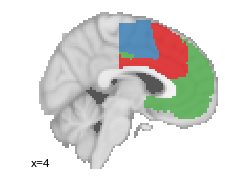

In [17]:
colors = sns.color_palette('Set1', 3)
plt.plot_roi(three_file, cut_coords=[4], display_mode='x', 
             draw_cross=False, cmap = ml.colors.ListedColormap(colors), alpha=0.8)

# mlplt.savefig('../reports/papers/mFC/parcellation/3.pdf')

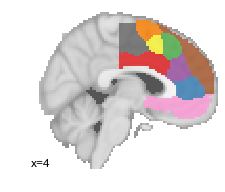

In [18]:
from base.plotting import nine_colors
plt.plot_roi(nine_file, cut_coords=[4], display_mode='x', 
             draw_cross=False, cmap = ml.colors.ListedColormap(nine_colors), alpha=0.8)

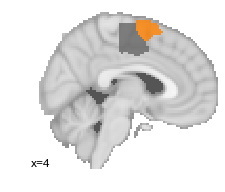

In [19]:
c = [col for i, col in enumerate(nine_colors) if i+1 in posterior]
plot_subset(nine_file, posterior, display_mode='x', cut_coords=[4], draw_cross=False, colors = c, alpha=0.8)

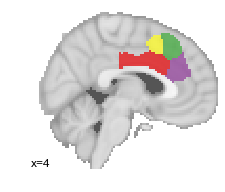

In [20]:
c = [col for i, col in enumerate(nine_colors) if i+1 in middle]
plot_subset(nine_file, middle, display_mode='x', cut_coords=[4], draw_cross=False, colors = nine_colors, alpha=0.8)

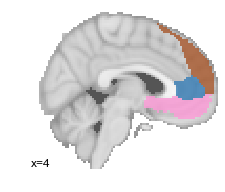

In [21]:
c = [col for i, col in enumerate(nine_colors) if i+1 in anterior]
plot_subset(nine_file, anterior, display_mode='x', cut_coords=[4], draw_cross=False, colors = c, alpha=0.8)

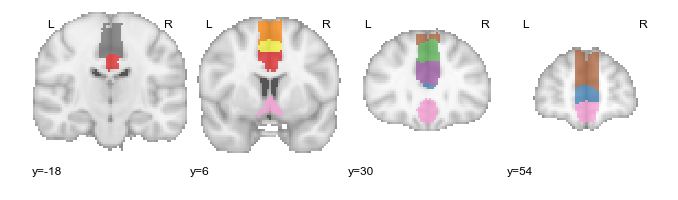

In [22]:
plt.plot_roi(nine_file, display_mode='y', cut_coords=np.arange(-18, 62, 24),
             draw_cross=False, cmap = ml.colors.ListedColormap(nine_colors), alpha=0.7)

In [23]:
from random import shuffle
colors = sns.color_palette("hls", 12)
shuffle(colors)
plt.plot_roi('../results/clustering/results/MFC/MF/kmeans_k12/cluster_labels.nii.gz', cut_coords=[4], display_mode='x', draw_cross=False, 
             cmap = ml.colors.ListedColormap(colors), alpha=0.95)
mlplt.savefig('../reports/MFC/mFC_Shared/Figures/clustering_15_regions_1.png')


ValueError: File not found: '../results/clustering/results/MFC/MF/kmeans_k12/cluster_labels.nii.gz'

# Figure 3 - Co-activation contrast

In [ ]:
def mask_level(path, level):
    img = nib.load(path)
    data = img.get_data()
    data[:] = np.round(data)
    data[data != level] = 0 
    data[data == level] = 1
    
    return img

In [ ]:
from neurosynth.analysis.meta import MetaAnalysis

In [24]:
def make_thresholded_slices(regions, colors, display_mode='z', overplot=True, binarize=True, **kwargs):
    """ Plots on axial slices numerous images
    regions: Nibabel images
    colors: List of colors (rgb tuples)
    overplot: Overlay images?
    binarize: Binarize images or plot full stat maps
    """             
    if binarize:
        for reg in regions:
             reg.get_data()[reg.get_data().nonzero()] = 1
                                   
    for i, reg in enumerate(regions):
        reg_color = ml.colors.LinearSegmentedColormap.from_list('reg1', [colors[i], colors[i]])
        if i == 0:
            plot = plt.plot_stat_map(reg, draw_cross=False,  display_mode=display_mode, cmap = reg_color, alpha=0.9, colorbar=False, **kwargs)
        else:
            if overplot:
                plot.add_overlay(reg, cmap = reg_color, alpha=.72)
            else:
                plt.plot_stat_map(reg, draw_cross=False,  display_mode=display_mode, cmap = reg_color, colorbar=False, **kwargs)
    
    return plot

In [34]:
from base.coactivation import coactivation_contrast

In [25]:
cut_coords = np.arange(-15, 60, 12)

In [26]:
cut_coords

array([-15,  -3,   9,  21,  33,  45,  57])

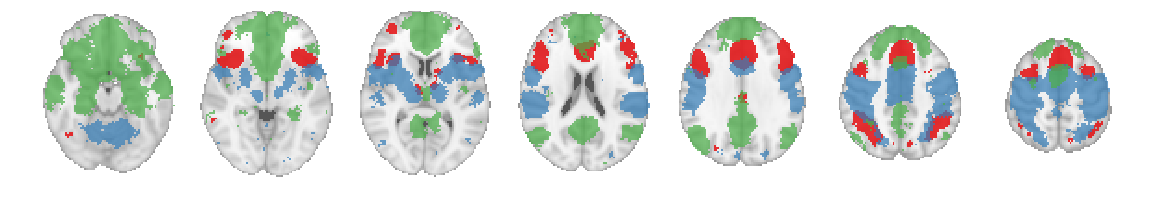

In [28]:
contrast_mas = coactivation_contrast(
    dataset, three_file, [1, 2, 3])
make_thresholded_slices(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=cut_coords, annotate=False)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

/Users/aleph4/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4085: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


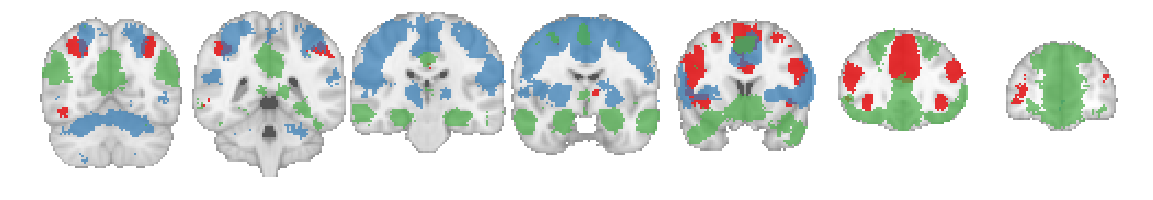

In [14]:
make_thresholded_slices(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)
mlplt.savefig('../reports/MFC/Fig3_Coronal_3.png',bbox_inches='tight')

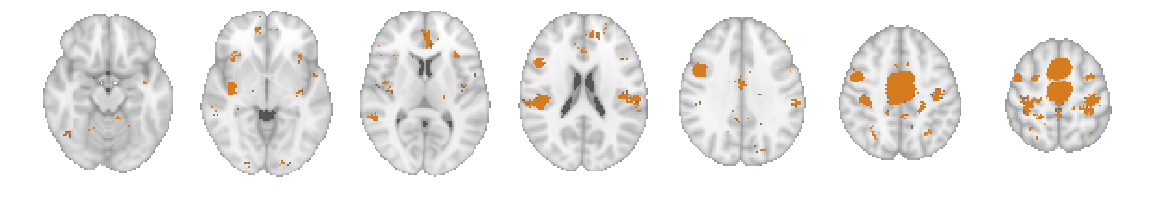

In [48]:
contrast_mas = coactivation_contrast(
    dataset, nine_file, posterior, target_thresh=0.051, other_thresh=0.05, q=0.1)
colors = list(reversed([c for i, c in enumerate(nine_colors) if i + 1 in posterior]))
make_thresholded_slices(list(reversed(contrast_mas)), colors, 
                       cut_coords=cut_coords, annotate=False)

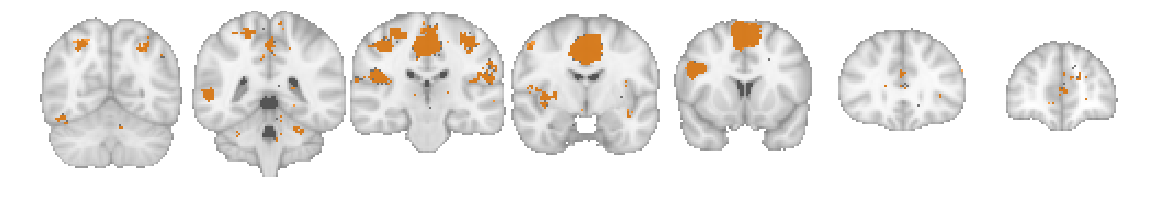

In [49]:
make_thresholded_slices(list(reversed(contrast_mas)), colors, 
                       cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)
mlplt.savefig('../reports/MFC/Fig3_Coronal_Posterior.png',bbox_inches='tight')

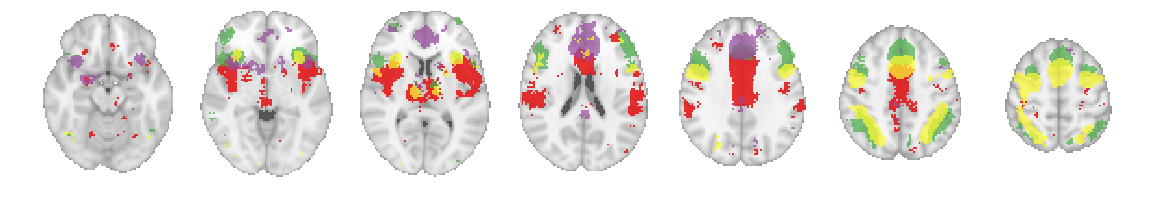

In [50]:
contrast_mas = coactivation_contrast(
    dataset, nine_file, middle, target_thresh=0.07)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in middle]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

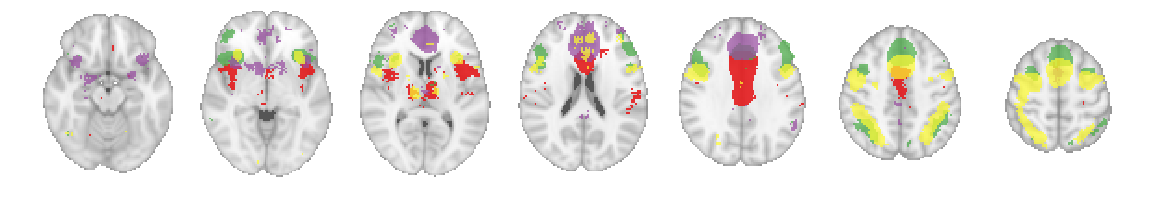

In [52]:
contrast_mas = coactivation_contrast(
    dataset, nine_file, middle, q=0.05)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in middle]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

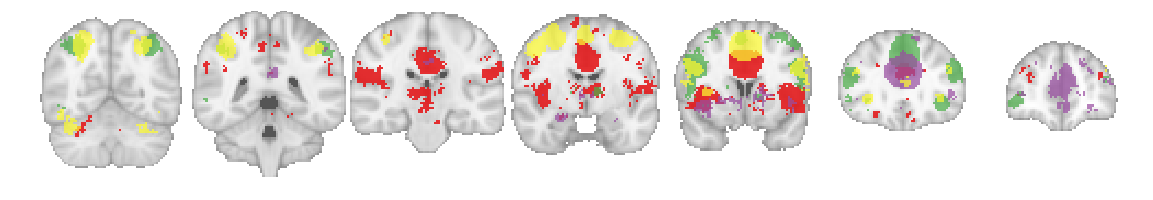

In [24]:
make_thresholded_slices(contrast_mas, colors ,cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)
mlplt.savefig('../reports/MFC/Fig3_Coronal_Middle.png',bbox_inches='tight')

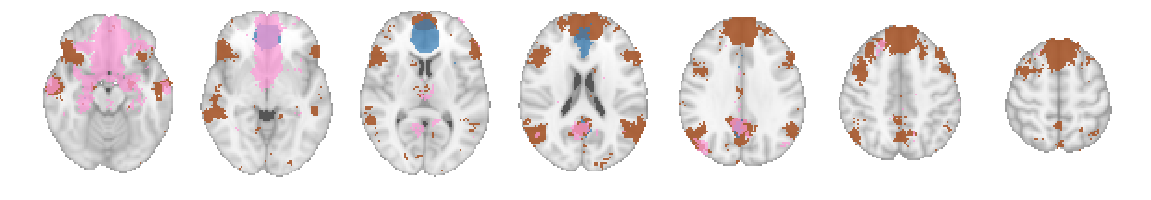

In [25]:
contrast_mas = coactivation_contrast(
    dataset, nine_file, anterior, target_thresh=0.07)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in anterior]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

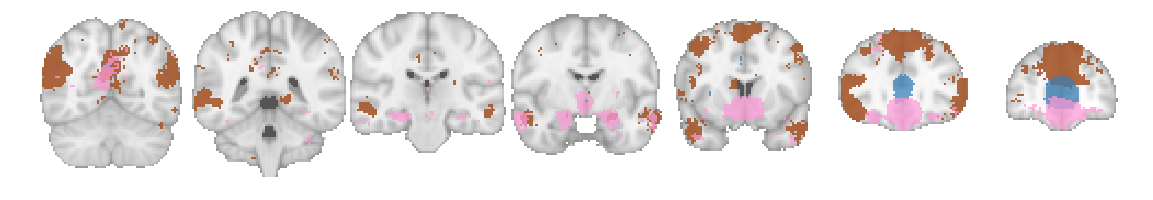

In [26]:
make_thresholded_slices(contrast_mas, colors ,cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)
mlplt.savefig('../reports/MFC/Fig3_Coronal_Anterior.png',bbox_inches='tight')

+###### make_thresholded_slices(contrast_mas, colors ,cut_coords=range(-60, 50, 18), display_mode='y')
mlplt.savefig('../reports/MFC/Fig3_Coronal_Anterior.png',bbox_inches='tight')